In [1]:
import pandas as pd
import codebase

In [2]:
grealm_raw = pd.read_csv('https://ipad.fas.usda.gov/lakes/images/lake000462.10d.2.smooth.txt',header=12,sep = ' ',skipinitialspace=True)

In [3]:
grealm_raw.rename(columns={ '99999999':'Date', 
                           '99':'Hour', 
                           '99.1':'Minute',
                           '999.99':'height_var_JASON2',
                           '9999.99':'height_mMSL'},
                 inplace=True)

In [4]:
grealm_nanfiltered = grealm_raw.loc[(grealm_raw['Date']!=99999999) & (grealm_raw['height_mMSL'] != 9999.99)]
grealm_nanfiltered.index = pd.to_datetime(grealm_nanfiltered['Date'],format='%Y%m%d')

In [5]:
grealm_all_heights = grealm_nanfiltered[['height_var_JASON2','height_mMSL']]

In [6]:
grealm_all_heights_M = codebase.time_series_calcs.resample_to_monthly(grealm_all_heights)
grealm_all_heights_M

,height_var_JASON2,height_mMSL
Date,,
1992-10-01,-5.155000,1102.540000
1992-11-01,-5.830000,1103.080000
1992-12-01,NaN,NaN
1993-01-01,-6.423333,1101.596667
1993-02-01,-6.630000,1101.520000
...,...,...
2024-03-01,-22.250000,1086.250000
2024-04-01,-22.620000,1085.475000
2024-05-01,-21.437500,1086.667500


In [7]:
pd.to_datetime('2018-01-01')

Timestamp('2018-01-01 00:00:00')

<Axes: xlabel='Date'>

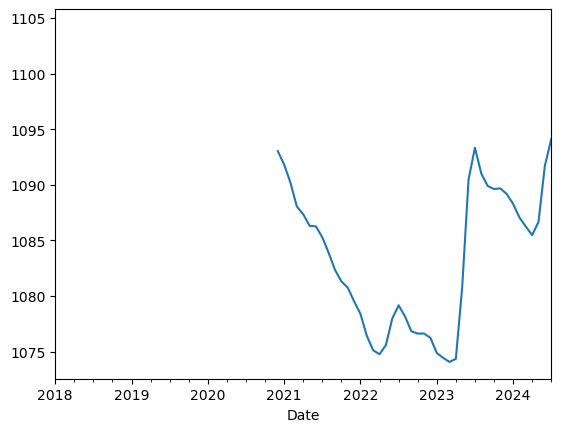

In [8]:
grealm_all_heights_M.loc[pd.to_datetime('2018-01-01'):,'height_mMSL'].plot()